Extract Data From API 

Successfully fetched weather data!
    Temperature Min (°C)  Temperature Max (°C)  Temperature Mean (°C)
0                   8.33                  8.45                   8.45
1                   7.48                  7.82                   7.82
2                   5.84                  5.84                   5.84
3                   5.26                  5.26                   5.26
4                   4.97                  4.97                   4.97
5                   4.50                  4.50                   4.50
6                   4.09                  4.09                   4.09
7                   6.73                  6.73                   6.73
8                   9.64                  9.64                   9.64
9                   9.61                  9.61                   9.61
10                  5.77                  5.77                   5.77
11                  4.36                  4.36                   4.36
12                  3.54                  3.54         

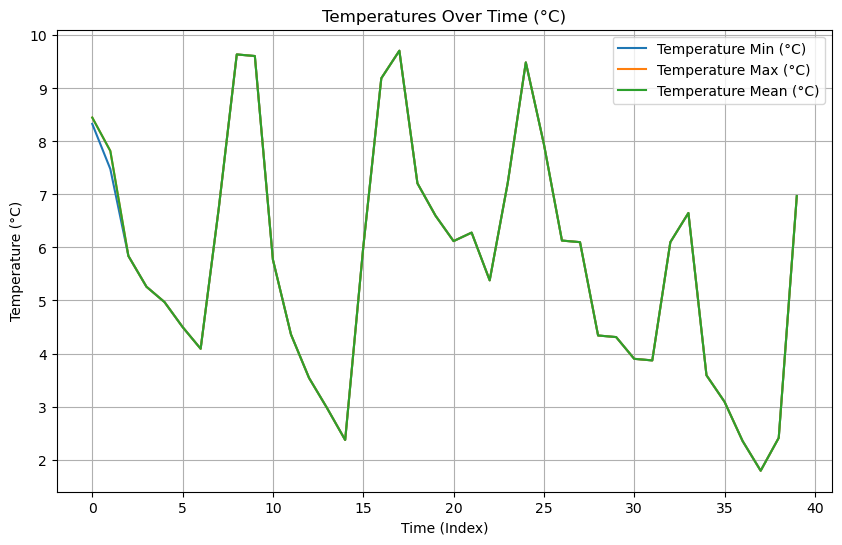

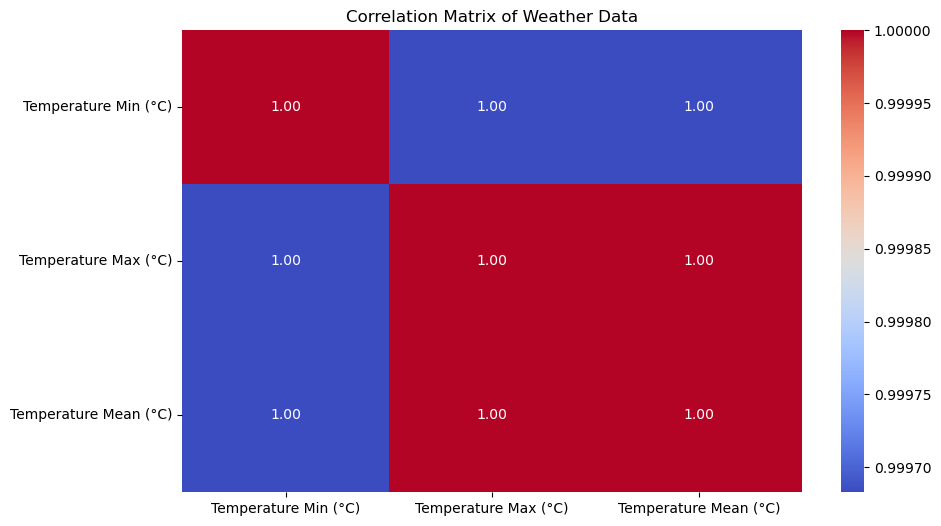

In [8]:
# import requests
# import pandas as pd
# import key  # Ensure key.api_key is defined in the key.py file
# import matplotlib.pyplot as plt

# # API endpoint and parameters
# url = 'https://api.openweathermap.org/data/2.5/forecast'
# params = {
#     'lat': 35,  # Latitude for the location
#     'lon': 139,  # Longitude for the location
#     'units': 'metric',  # Use metric units for temperature (°C)
#     'appid': key.api_key  # API key
# }

# # Make the GET request
# response = requests.get(url, params=params)

# if response.status_code == 200:
#     data = response.json()  # Parse JSON data
    
#     # Extract data from the response
#     forecast_list = data['list']
#     temperature_min = [entry['main']['temp_min'] for entry in forecast_list]
#     temperature_max = [entry['main']['temp_max'] for entry in forecast_list]
#     temperature_mean = [entry['main']['temp'] for entry in forecast_list]

#     # Create a DataFrame
#     weather_data = {
#         'Temperature Min (°C)': temperature_min,
#         'Temperature Max (°C)': temperature_max,
#         'Temperature Mean (°C)': temperature_mean
#     }
#     df = pd.DataFrame(weather_data)
#     print(df)
# else:
#     print(f'Failed to fetch data from the API. Status code: {response.status_code}, Error: {response.text}')


# temp = df
# temp.plot(figsize=(10, 6), title='Temperatures Over Time (Fahrenheit)', grid=True)

# plt.xlabel('Date')
# plt.ylabel('Temperature (°F)')

# plt.show()

# #import pandas as pd
# #import matplotlib.pyplot as plt
# import seaborn as sb

# corrMatrix = temp.corr()
# plt.figure(figsize=(10,6))
# sb.heatmap(corrMatrix)


# import requests
# import key  # Ensure key.api_key is defined in the key.py file

# class WeatherAPI:
#     def __init__(self, lat, lon, api_key):
#         self.lat = lat
#         self.lon = lon
#         self.api_key = api_key
#         self.url = 'https://api.openweathermap.org/data/2.5/forecast'

#     def gather_data(self):
#         params = {
#             'lat': self.lat,
#             'lon': self.lon,
#             'units': 'metric',  # Fetch data in metric units (Celsius)
#             'appid': self.api_key  # API key
#         }

#         # Make the GET request
#         response = requests.get(self.url, params=params)

#         if response.status_code == 200:
#             data = response.json()  # Parse JSON data
#             return data  # Return the fetched data
#         else:
#             print(f'Failed to fetch data from the API. Status code: {response.status_code}, Error: {response.text}')
#             return None

# # Example usage:
# if __name__ == "__main__":
#     lat = 35
#     lon = 139
#     api_key = key.api_key  # Ensure your key.py file has a valid API key

#     weather_api = WeatherAPI(lat, lon, api_key)
#     weather_data = weather_api.gather_data()

#     if weather_data:
#         print("Successfully fetched weather data!")
#         print(weather_data)
#     else:
#         print("Failed to fetch weather data.")

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import key  # Ensure key.api_key is defined in the key.py file


# Parent class: WeatherAPI (Encapsulation)
class WeatherAPI:
    def __init__(self, lat, lon, api_key):
        self.lat = lat
        self.lon = lon
        self.api_key = api_key
        self.url = 'https://api.openweathermap.org/data/2.5/forecast'

    def gather_data(self):
        params = {
            'lat': self.lat,
            'lon': self.lon,
            'units': 'metric',  # Fetch data in metric units (Celsius)
            'appid': self.api_key  # API key
        }
        response = requests.get(self.url, params=params)

        if response.status_code == 200:
            data = response.json()  # Parse JSON data
            return data  # Return fetched data
        else:
            print(f'Failed to fetch data from the API. Status code: {response.status_code}, Error: {response.text}')
            return None


# Child class: EnhancedWeatherAPI (Inheritance)
class EnhancedWeatherAPI(WeatherAPI):
    def filter_data(self, data):
        """Extract only the necessary weather data."""
        forecast_list = data['list']
        temperature_data = {
            'Temperature Min (°C)': [entry['main']['temp_min'] for entry in forecast_list],
            'Temperature Max (°C)': [entry['main']['temp_max'] for entry in forecast_list],
            'Temperature Mean (°C)': [entry['main']['temp'] for entry in forecast_list]
        }
        return pd.DataFrame(temperature_data)  # Return as DataFrame


# Data processor class: WeatherDataProcessor
class WeatherDataProcessor:
    @staticmethod
    def plot_data(df):
        """Plot weather data as a line chart."""
        df.plot(figsize=(10, 6), title='Temperatures Over Time (°C)', grid=True)
        plt.xlabel('Time (Index)')
        plt.ylabel('Temperature (°C)')
        plt.show()

    @staticmethod
    def correlation_heatmap(df):
        """Generate a heatmap for correlations."""
        corr_matrix = df.corr()
        plt.figure(figsize=(10, 6))
        sb.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Matrix of Weather Data")
        plt.show()


# Main application
if __name__ == "__main__":
    # Step 1: Initialize API
    lat = 35
    lon = 139
    api_key = key.api_key  # Ensure your key.py file has a valid API key

    # Step 2: Fetch weather data
    weather_api = EnhancedWeatherAPI(lat, lon, api_key)
    weather_data = weather_api.gather_data()

    if weather_data:
        print("Successfully fetched weather data!")

        # Step 3: Process data
        processor = WeatherDataProcessor()
        df = weather_api.filter_data(weather_data)
        print(df)

        # Step 4: Visualizations
        processor.plot_data(df)  # Line chart of temperatures
        processor.correlation_heatmap(df)  # Heatmap of correlations
    else:
        print("Failed to fetch weather data.")
